In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Read CSV file
import pandas as pd

# Plotting library
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# Feature engineering
import math

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [2]:
# import training CSV
fname = './data/train.csv'
# use pandas to read the CSV properly of all different types
data_pd = pd.read_csv(fname)
# convert to a numpy array
data = np.array(data_pd)
# remove categorical data - force cast attempt then remove failures
cols_to_remove = []
for i in range(data.shape[1]):
    try:
        data[:,i] = data[:,i].astype(float)
    except:
        cols_to_remove.append(i)

data = np.delete(data, cols_to_remove, axis=1)
# remove rows with nan values
rows_to_remove = []
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if math.isnan(data[i,j]):
            rows_to_remove.append(i)
            break

data = np.delete(data, rows_to_remove, axis=0)

# remove outliers with standard deviation TODO()

# take the actual prices and add them to results y
y = data[:, data.shape[1] - 1]
# remove prices column from data
data = np.delete(data, data.shape[1] - 1, 1)
data = data.astype(float)
print("data shape", data.shape)
print("Y shape:", y.shape)

pd.DataFrame(data)

data shape (1121, 37)
Y shape: (1121,)


,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,460.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0
1117,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,500.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0
1118,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,...,252.0,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0
1119,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,240.0,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0


In [ ]:
data_pd.info()
data_pd.describe().transpose()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data,
    y,
    test_size=0.33, 
    random_state=101
)
#features scaling
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float)) #was np.float

print(X_train)


[[-1.32665577 -0.86064007 -0.48724167 ... -0.14862098 -0.10826821
  -0.63418711]
 [ 1.31240183 -0.12210567 -0.94458263 ... -0.14862098 -1.23756584
   1.61947782]
 [-1.26199646 -0.86064007  0.19876976 ... -0.14862098  0.26816433
   0.11703453]
 ...
 [-1.539792    3.32438822 -0.48724167 ... -0.14862098  1.7738945
  -0.63418711]
 [ 0.08626981  0.61642874  1.06771757 ... -0.14862098 -1.23756584
   1.61947782]
 [ 0.91486684  0.61642874  0.65611071 ... -0.14862098  2.15032705
   0.11703453]]


<ipython-input-4-07d321ab711e>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = s_scaler.fit_transform(X_train.astype(np.float))
<ipython-input-4-07d321ab711e>:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = s_scaler.transform(X_test.astype(np.float)) #was np.float


In [5]:
# multiple linear regressions

# Multiple Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#evaluate the model (intercept and slope)
#print(regressor.intercept_)
#print(regressor.coef_)
#predicting the test set result
y_pred = regressor.predict(X_test)
#put results as a DataFrame
'''coeff_df = pd.DataFrame(regressor.coef_, Data.drop('price',axis =1).columns, columns=['Coefficient']) 
coeff_df'''

"coeff_df = pd.DataFrame(regressor.coef_, Data.drop('price',axis =1).columns, columns=['Coefficient']) \ncoeff_df"

In [6]:
#compare actual output values with predicted values
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 25352.99162586545
MSE: 3557968639.503193
RMSE: 59648.71029203559
VarScore: 0.569599399524959


In [9]:
# Keras deep learning model

# Creating a Neural Network Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [10]:
model = Sequential()
features = data.shape[1]

model.add(Dense(features,activation='relu'))
model.add(Dense(features,activation='relu'))
model.add(Dense(features,activation='relu'))
model.add(Dense(features,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [11]:
'''X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')'''
X_train = tf.convert_to_tensor(X_train, dtype=tf.int64)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int64)
X_test = tf.convert_to_tensor(X_test, dtype=tf.int64)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int64)

model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)
model.summary()

Epoch 1/400
6/6 [==============================] - 0s 25ms/step - loss: 39660953600.0000 - val_loss: 44612194304.0000
Epoch 2/400
6/6 [==============================] - 0s 5ms/step - loss: 39660789760.0000 - val_loss: 44611973120.0000
Epoch 3/400
6/6 [==============================] - 0s 5ms/step - loss: 39660580864.0000 - val_loss: 44611670016.0000
Epoch 4/400
6/6 [==============================] - 0s 5ms/step - loss: 39660285952.0000 - val_loss: 44611190784.0000
Epoch 5/400
6/6 [==============================] - 0s 6ms/step - loss: 39659798528.0000 - val_loss: 44610408448.0000
Epoch 6/400
6/6 [==============================] - 0s 5ms/step - loss: 39659020288.0000 - val_loss: 44609105920.0000
Epoch 7/400
6/6 [==============================] - 0s 6ms/step - loss: 39657725952.0000 - val_loss: 44606959616.0000
Epoch 8/400
6/6 [==============================] - 0s 6ms/step - loss: 39655624704.0000 - val_loss: 44603482112.0000
Epoch 9/400
6/6 [==============================] - 0s 6ms/step 

<AxesSubplot:>

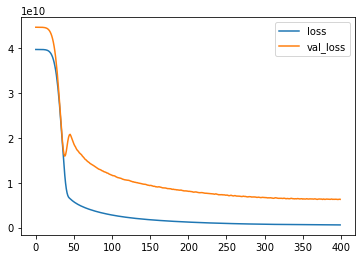

In [12]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

MAE: 26944.318517736487
MSE: 6288010496.276267
RMSE: 79296.97658975572
VarScore: 0.24056260171406152


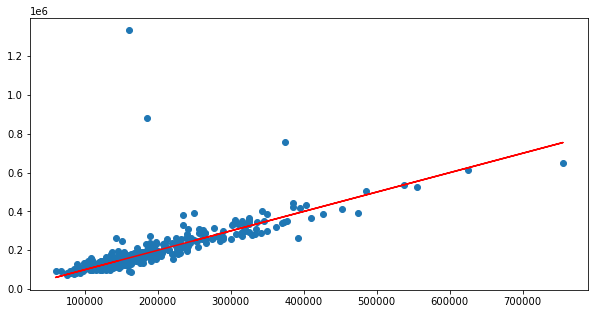

In [13]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')


c:\Users\colli\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

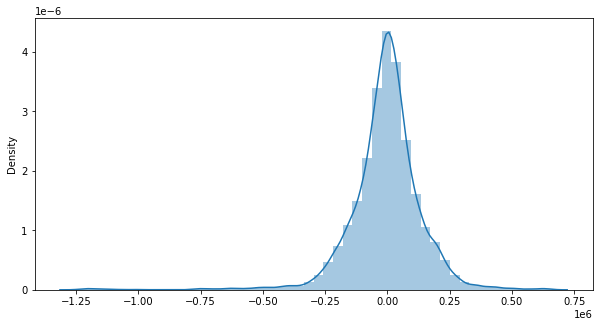

In [14]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)